In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
from sklearn import datasets

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_data = pd.merge(study_results, mouse_metadata, how="left", on="Mouse ID")

In [2]:
# Display the data table for preview
combined_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [3]:
# Checking the number of mice.
mice_counter = combined_data["Mouse ID"].value_counts()
mice_number = len(mice_counter)
mice_number

249

In [4]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

duplicate_mice = combined_data.loc[combined_data.duplicated(subset=['Mouse ID', 'Timepoint',]),'Mouse ID'].unique()
duplicate_mice


array(['g989'], dtype=object)

In [5]:
# Optional: Get all the data for the duplicate mouse ID. 

duplicate_mice_df = combined_data.loc[combined_data["Mouse ID"] == "g989", :]
duplicate_mice_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_data = combined_data[combined_data['Mouse ID'].isin(duplicate_mice)==False]
cleaned_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [7]:
# Checking the number of mice in the clean DataFrame.
clean_mice_value = cleaned_data["Mouse ID"].value_counts()
clean_mice_count = len(clean_mice_value)
clean_mice_count

248

# Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

mean_df = cleaned_data.groupby('Drug Regimen').mean()["Tumor Volume (mm3)"]
median_df = cleaned_data.groupby('Drug Regimen').median()["Tumor Volume (mm3)"]
variance_df = cleaned_data.groupby('Drug Regimen').var()["Tumor Volume (mm3)"]
std_dev_df = cleaned_data.groupby('Drug Regimen').std()["Tumor Volume (mm3)"]
sem_df = cleaned_data.groupby('Drug Regimen').sem()["Tumor Volume (mm3)"]


C:\Users\Aadhithya\AppData\Local\Temp\ipykernel_9932\1271001397.py:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mean_df = cleaned_data.groupby('Drug Regimen').mean()["Tumor Volume (mm3)"]
C:\Users\Aadhithya\AppData\Local\Temp\ipykernel_9932\1271001397.py:8: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  median_df = cleaned_data.groupby('Drug Regimen').median()["Tumor Volume (mm3)"]
C:\Users\Aadhithya\AppData\Local\Temp\ipykernel_9932\1271001397.py:9: FutureWarning: The default value of numeric_only in DataFrameGroupBy.var is deprecated. In a future version, numeric_only will default to False. Either sp

In [9]:
#Display Summary Stats Table 

summary_table = pd.DataFrame({"Mean Tumor Volume": mean_df, 
                                    "Median Tumor Volume":median_df, 
                                    "Tumor Volume Variance":variance_df, 
                                    "Tumor Volume Std. Dev.": std_dev_df, 
                                    "Tumor Volume Std. Err.": sem_df})

summary_table

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [11]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line

agg_summary_table =  cleaned_data.groupby(['Drug Regimen'])[['Tumor Volume (mm3)']].agg(['mean', 'median', 'var', 'std', 'sem'])
agg_summary_table

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

<function matplotlib.pyplot.show(close=None, block=None)>

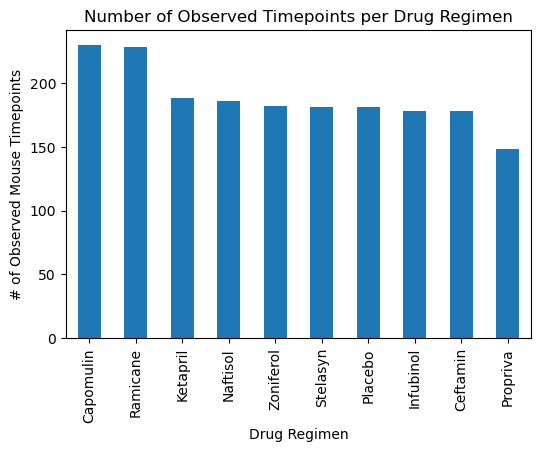

In [12]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

#Extracting just the number of rows for each Data Regimen 
mouse_count = cleaned_data["Drug Regimen"].value_counts()

bar_chart = mouse_count.plot(kind='bar', color = 'tab:blue' , figsize=(6,4))
bar_chart.set_xlabel("Drug Regimen")
bar_chart.set_ylabel("# of Observed Mouse Timepoints")
plt.title("Number of Observed Timepoints per Drug Regimen", fontsize =12)

plt.show

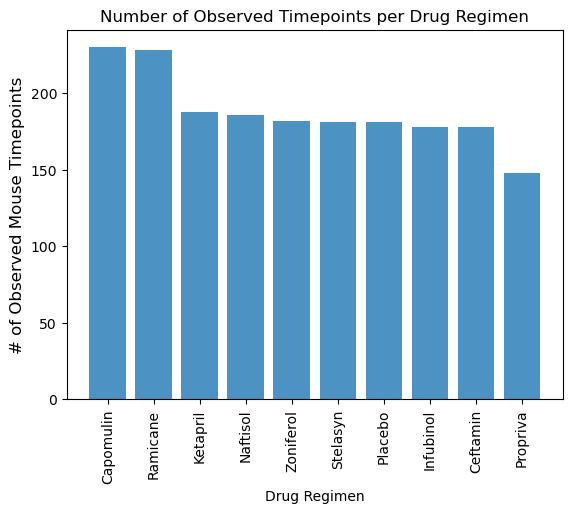

In [13]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

x_axis = mouse_count.index.values
y_axis = mouse_count.values


# Create a Pyplot bar plot based off of the group series from before and label the title
plt.bar(x_axis, y_axis, color='tab:blue', alpha=0.8, align='center')

# Set the xlabel and ylabel, title using class methods
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints", fontsize =12)
plt.xticks(rotation="vertical")
plt.title("Number of Observed Timepoints per Drug Regimen")

plt.show()

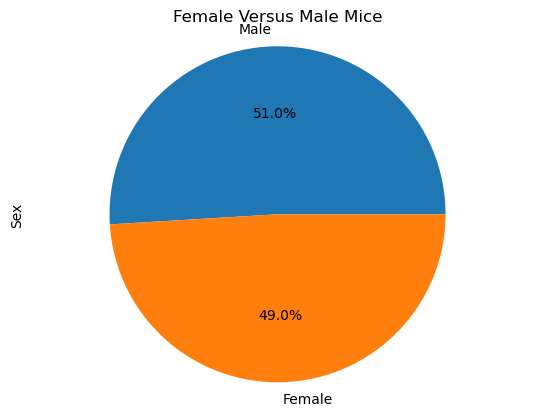

In [20]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

gender_data = cleaned_data["Sex"].value_counts()

gender_chart = gender_data.plot(kind="pie", autopct= "%1.1f%%")
plt.title("Female Versus Male Mice", fontsize=12)

plt.axis("equal")
plt.show()

Text(0, 0.5, 'Sex')

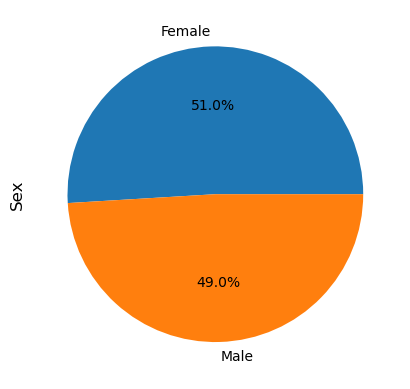

In [21]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

labels = ['Female', 'Male']

gender_py_chart = plt.pie(gender_data, autopct="%1.1f%%", labels=labels)
plt.ylabel("Sex", fontsize =12)



# Quartiles, Outliers and Boxplots

In [22]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin


# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = combined_data.groupby(["Mouse ID"])["Timepoint"].max()
last_timepoint = last_timepoint.reset_index()


In [23]:
# Put treatments into a list for for loop (and later for plot labels)
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merged_data_tp = last_timepoint.merge(combined_data, on=["Mouse ID", "Timepoint"], how="left")
merged_data_tp.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29


In [24]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"] 

# Create empty list to fill with tumor vol data (for plotting)
tumor_volume_total = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in treatments:

    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_vol = merged_data_tp.loc[merged_data_tp["Drug Regimen"] == drug, "Tumor Volume (mm3)"]
    
    # add subset 
    tumor_volume_total.append(tumor_vol)
    
    # Determine outliers using upper and lower bounds
    quartiles = tumor_vol.quantile([.25, .5, .75])
    lowerq = quartiles[.25]
    upperq = quartiles[.75]
    iqr = upperq - lowerq 
    
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = tumor_vol.loc[(tumor_vol < lower_bound) | (tumor_vol > upper_bound)]
    print(f"For {drug}, the outliers are: {outliers}")

For Capomulin, the outliers are: Series([], Name: Tumor Volume (mm3), dtype: float64)
For Ramicane, the outliers are: Series([], Name: Tumor Volume (mm3), dtype: float64)
For Infubinol, the outliers are: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
For Ceftamin, the outliers are: Series([], Name: Tumor Volume (mm3), dtype: float64)


<function matplotlib.pyplot.show(close=None, block=None)>

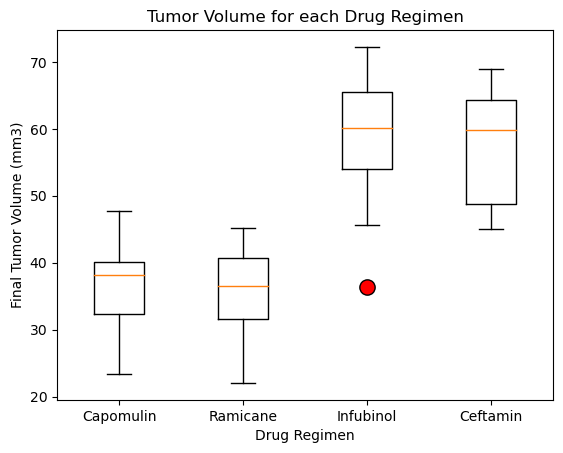

In [32]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig1, ax1 = plt.subplots()
ax1.set_title('Tumor Volume for each Drug Regimen', fontsize =12)
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.set_xlabel('Drug Regimen')

#Setting properties for Outliers using flierprops dictionary 
outlier_dot = dict(markerfacecolor = "red", markersize=11)


ax1.boxplot(tumor_volume_total, labels=treatments, widths = 0.4, flierprops= outlier_dot)
plt.show

# Line and Scatter Plots

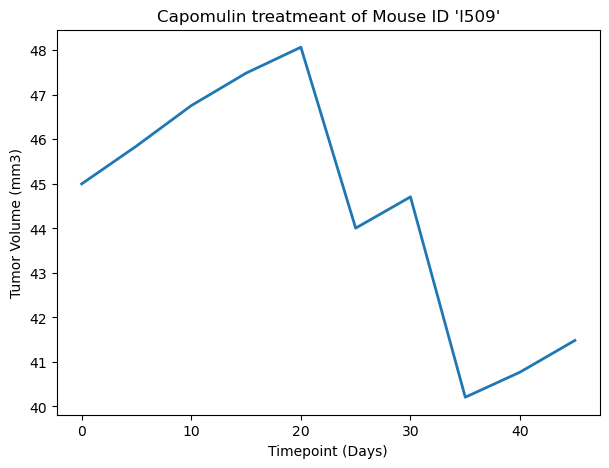

In [33]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

Capomulin_data = combined_data.loc[combined_data["Drug Regimen"] == "Capomulin",:]
Capomulin_data

# Get data for a specific mouse (e.g. Mouse ID = "l509")
mouse_in_Capomulin = Capomulin_data.loc[Capomulin_data["Mouse ID"] == "l509",:]
mouse_in_Capomulin

#Setting parameters for chart
x_axis_cam = mouse_in_Capomulin["Timepoint"]
Tumor_vol = mouse_in_Capomulin["Tumor Volume (mm3)"]

fig1, ax1 = plt.subplots(figsize=(7,5))
plt.title("Capomulin treatmeant of Mouse ID 'l509'", fontsize =12)
plt.plot(x_axis_cam, Tumor_vol, linewidth=2, color="tab:blue", label="mm3")
plt.xlabel("Timepoint (Days)")
plt.ylabel("Tumor Volume (mm3)")


plt.show()

C:\Users\Aadhithya\AppData\Local\Temp\ipykernel_9932\1219650978.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  Avg_Capom = Capomulin_data.groupby(['Mouse ID']).mean()


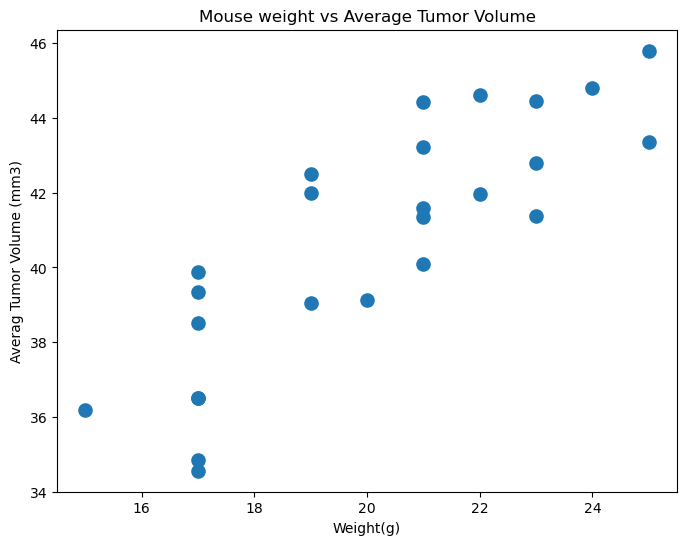

In [35]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

Avg_Capom = Capomulin_data.groupby(['Mouse ID']).mean()

fig1, ax1 = plt.subplots(figsize=(8, 6))
marker_size=14
plt.scatter(Avg_Capom['Weight (g)'],Avg_Capom['Tumor Volume (mm3)'],s=90, color="tab:blue")
plt.title("Mouse weight vs Average Tumor Volume",fontsize =12)
plt.xlabel("Weight(g)")
plt.ylabel("Averag Tumor Volume (mm3)")


plt.show()


# Correlation and Regression

The correlation between mouse weight and average tumor volume is: 0.84


Text(0, 0.5, 'Averag Tumor Volume (mm3)')

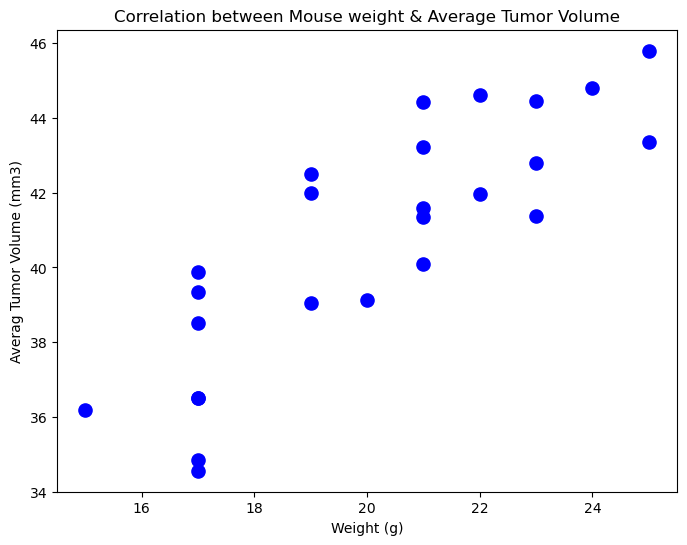

In [36]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen


correlation = round(st.pearsonr(Avg_Capom['Weight (g)'],Avg_Capom['Tumor Volume (mm3)'])[0],2)
print(f"The correlation between mouse weight and average tumor volume is: {correlation}")

fig1, ax1 = plt.subplots(figsize=(8, 6))
plt.scatter(Avg_Capom['Weight (g)'],Avg_Capom['Tumor Volume (mm3)'],s=90, color="blue")
plt.title("Correlation between Mouse weight & Average Tumor Volume",fontsize =12)
plt.xlabel("Weight (g)")
plt.ylabel("Averag Tumor Volume (mm3)")

y = 0.95x + 21.55


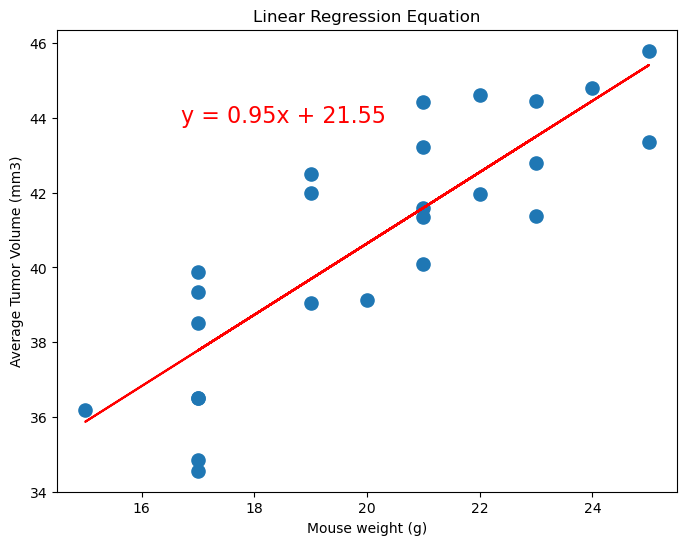

In [38]:
# Add the linear regression equation and line to the scatter plot
x_values = Avg_Capom['Weight (g)']
y_values = Avg_Capom['Tumor Volume (mm3)']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)

fig1, ax1 = plt.subplots(figsize=(8, 6))
plt.scatter(x_values,y_values, s=90, color="tab:blue")
plt.plot(x_values,regress_values,"r-")
plt.title("Linear Regression Equation", fontsize=12)
plt.xlabel("Mouse weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.annotate(line_eq, xy=(20,40), xycoords="data",xytext=(0.2, 0.80), textcoords="axes fraction", fontsize=16,color="red")

plt.show()